In [12]:
import numpy as np
import pandas as pd
from rbm import RBM
from sklearn.neural_network import BernoulliRBM

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [13]:
training_data = np.array([[1,1,1,0,0,0],
                          [1,0,1,0,0,0],
                          [1,1,1,0,0,0],
                          [0,0,1,1,1,0], 
                          [0,0,1,1,0,0],
                          [0,0,1,1,1,0]])

In [14]:
rbm = RBM(num_hidden=2)
rbm.fit(training_data.T, learning_rate=0.1, n_iters=1000)

sk_rbm = BernoulliRBM(n_components=2, learning_rate=0.1, batch_size=training_data.shape[0], n_iter=1000)
sk_rbm.fit(training_data)

BernoulliRBM(batch_size=6, learning_rate=0.1, n_components=2, n_iter=1000,
       random_state=None, verbose=0)

In [15]:
print('Weight:')
print(rbm.getWeight())
print('\nHidden layer bias:')
print(rbm.getHiddenBias().ravel())
print('\nVisible layer bias')
print(rbm.getVisibleBias().ravel())


Weight:
[[ 3.51574813  1.60842512  2.42275283 -3.13354692 -4.03584689 -1.77420004]
 [-3.05429294 -4.04633806  2.40751906  3.38385832  1.59875287 -1.83522113]]

Hidden layer bias:
[ 0.71742284  0.64157241]

Visible layer bias
[-0.2223499  -0.59065864  2.94575205 -0.18786737 -0.62746895 -3.0504289 ]


In [16]:
print('scikit-learn result:\n')
print('Weight:')
print(sk_rbm.components_)
print('\nHidden layer bias:')
print(sk_rbm.intercept_hidden_) 
print('\nVisible layer bias')
print(sk_rbm.intercept_visible_)


scikit-learn result:

Weight:
[[ 0.34139943  0.12372676  2.05428448 -0.05121663 -0.19420752 -1.67941326]
 [-0.35117704 -0.46522037  1.90788635  0.50052847  0.24859211 -1.67462829]]

Hidden layer bias:
[ 0.72630076  0.56002614]

Visible layer bias
[ 0.15       -0.4         2.43333333 -0.3        -0.75       -2.86666667]


In [17]:
free_energy = rbm.computeFreeEnergy(training_data.T, rbm.getWeight(), rbm.getHiddenBias(), rbm.getVisibleBias())
sk_free_energy = np.sum(sk_rbm._free_energy(training_data))
print('free energy: {0:.3f}'.format(free_energy))
print('scikit-learn free energy: {0:.3f}'.format(sk_free_energy))

free energy: -43.528
scikit-learn free energy: -45.014


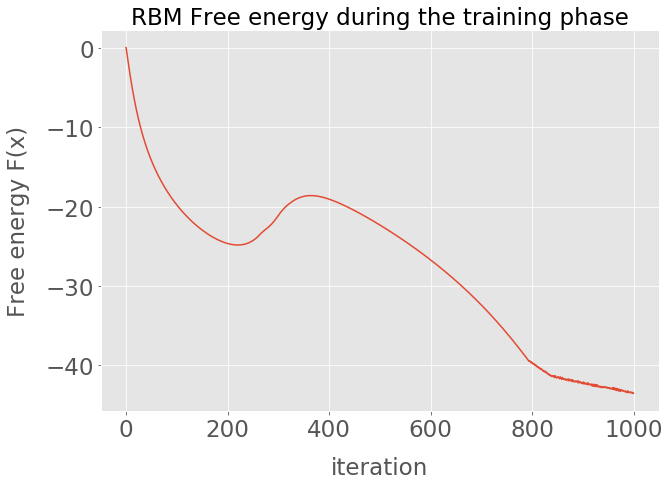

In [18]:
costs = rbm.getCost()['free_energy']

FONTSIZE = 23
fig, ax = plt.subplots(1, figsize=(10, 7))
ax.plot(costs, lw=1.5)  #, markersize=5)
ax.set_xlabel('iteration', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('Free energy F(x)', fontsize=FONTSIZE, labelpad=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
s = ax.set_title('RBM Free energy during the training phase', fontsize=FONTSIZE)